# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

---
## Step 0: Load The Data

In [6]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./data/test.p"
validation_file= "./data/valid.p"
testing_file = "./data/train.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_raw, y_train_raw = train['features'], train['labels']
X_valid_raw, y_valid = valid['features'], valid['labels']
X_test_raw, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

### Basic Summary of the Data Set

In [93]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
import pandas as pd

sign_df = pd.read_csv('./data/signnames.csv')
sign_name = sign_df['SignName'].tolist()

n_train = X_train_raw.shape[0]
n_validation = X_valid_raw.shape[0]
n_test = X_test_raw.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train_raw[0])
# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train_raw).shape[0]

print("Number of training examples =", n_train)
print("Number of validating examples = ", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 12630
Number of validating examples =  4410
Number of testing examples = 34799
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

#### Visualizing distribution of raw dataset

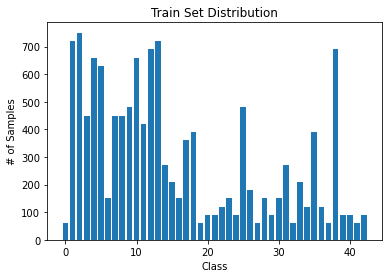

In [94]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
# Visualizations will be shown in the notebook.
%matplotlib inline

class_index, class_count = np.unique(y_train_raw, return_counts=True)

plt.bar(class_index, class_count)
plt.title("Train Set Distribution")
plt.xlabel("Class")
plt.ylabel("# of Samples")
plt.show()

### Image Augmentation

#### Grouping images by class for augumentation

In [ ]:
X_train_classified = []
for i in class_index:
    class_images = [img for j, img in enumerate(X_train_raw) if y_train_raw[j] == i]
    X_train_classified.append(class_images)


for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X_train_classified[42][i])
    plt.xticks([])
    plt.yticks([])


#### Augumentation Function
This function will create randomly zoomed in copy with brightness change.

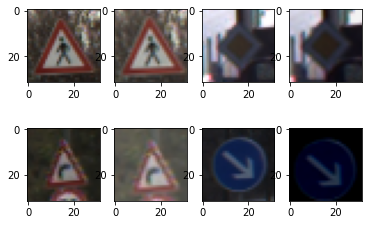

In [62]:
import cv2
import numpy.random as random

'''
Generating randomly zoomed in/out image and adding slight noise
'''
def generate_copy(img):

    # zoom and clipping
    rate = 1+(random.randint(1, 4))/20.0
    img=cv2.resize(img, dsize=(0,0), fx=rate, fy=rate, interpolation = cv2.INTER_CUBIC)
    
    x0 = random.randint(0, img.shape[1]-32)
    y0 = random.randint(0, img.shape[0]-32)
    x1 = x0+32
    y1 = y0+32
    img = img[y0:y1, x0:x1]

    # add brightness
    b_ = random.randint(-49, 50)
    b_filter = np.full_like(img.astype(np.int16), b_)
    img = np.clip((img.astype(np.int16)+b_filter),0,255).astype(np.uint8)
    
    return img

for i in range(4):
    img_sample=generate_copy(X_train_raw[i+10000])
    plt.subplot(2,4,2*i+1)
    plt.imshow(X_train_raw[i+10000])
    plt.subplot(2,4,2*i+2)
    plt.imshow(img_sample)
plt.show()

#### Augumenting Loop
This will iterate over each classes and augument number of examples.

In [63]:
X_train_aug = np.copy(X_train_raw)
y_train_aug = np.copy(y_train_raw)

# augument number of examples to the twice average level of classes.
average_count = 2* np.average(class_count).astype(np.int64)
for id in class_index:

    for j in range(average_count-class_count[id]):
        # randomly select image from classified classes
        r = random.randint(0, class_count[id])
        X_train_aug = np.vstack((X_train_aug, [generate_copy(X_train_classified[id][r])]))
        y_train_aug = np.append(y_train_aug, id)

    print("Augmented: ", id, end='')
    print("   # of total examples:", len(y_train_aug))

training_augmented_file = './data/train_aug.p'
with open(training_augmented_file, 'wb') as f:
    data = {'features': X_train_aug, 'labels': y_train_aug}
    pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)

Augmented:  0   # of total examples: 13156
Augmented:  1   # of total examples: 13156
Augmented:  2   # of total examples: 13156
Augmented:  3   # of total examples: 13292
Augmented:  4   # of total examples: 13292
Augmented:  5   # of total examples: 13292
Augmented:  6   # of total examples: 13728
Augmented:  7   # of total examples: 13864
Augmented:  8   # of total examples: 14000
Augmented:  9   # of total examples: 14106
Augmented:  10   # of total examples: 14106
Augmented:  11   # of total examples: 14272
Augmented:  12   # of total examples: 14272
Augmented:  13   # of total examples: 14272
Augmented:  14   # of total examples: 14588
Augmented:  15   # of total examples: 14964
Augmented:  16   # of total examples: 15400
Augmented:  17   # of total examples: 15626
Augmented:  18   # of total examples: 15822
Augmented:  19   # of total examples: 16348
Augmented:  20   # of total examples: 16844
Augmented:  21   # of total examples: 17340
Augmented:  22   # of total examples: 1780

#### Visualizing the distribution of augumented training set

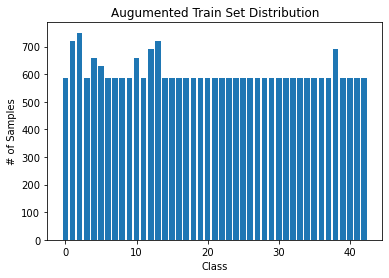

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

training_augmented_file = './data/train_aug.p'
with open(training_augmented_file, mode='rb') as f:
    test_aug = pickle.load(f)
    
X_train_aug, y_train_aug = test_aug['features'], test_aug['labels']

class_index, class_count_aug = np.unique(y_train_aug, return_counts=True)

plt.bar(class_index, class_count_aug)
plt.title("Augumented Train Set Distribution")
plt.xlabel("Class")
plt.ylabel("# of Samples")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Pre-process function

In [7]:
def preprocess(image):
    image = (np.array(image, dtype=np.int16)-128)/128.0
    return image

X_train = [preprocess(img) for img in X_train_aug]
y_train = y_train_aug
X_valid = [preprocess(img) for img in X_valid_raw]
X_test = [preprocess(img) for img in X_test_raw]

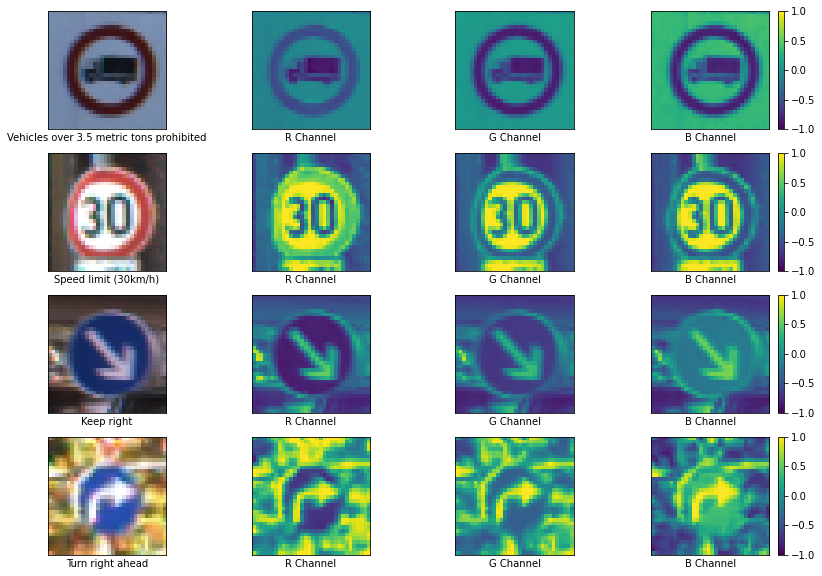

In [97]:
plt.figure(figsize=(14,10))
for i in range(4):
    plt.subplot(4,4,4*i+1)
    plt.imshow(X_train_aug[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(sign_name[y_train[i]])
    r_channel = X_train[i][:,:,0]
    g_channel = X_train[i][:,:,1]
    b_channel = X_train[i][:,:,2]
    plt.subplot(4,4,4*i+2)
    plt.imshow(r_channel, vmin=-1, vmax=1)
    plt.xlabel("R Channel")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,4,4*i+3)
    plt.imshow(g_channel, vmin=-1, vmax=1)
    plt.xlabel("G Channel")
    plt.xticks([])
    plt.yticks([])
    plt.subplot(4,4,4*i+4)
    c = plt.imshow(b_channel, vmin=-1, vmax=1)
    plt.colorbar(c)
    plt.xlabel("B Channel")
    plt.xticks([])
    plt.yticks([])
plt.show()

### Model Architecture

In [22]:
from tensorflow.contrib.layers import flatten


def modified_LeNet(x):    
    '''
    This is modified LeNet for traffic sign image. It's input has RGB channel depth and output is classes of 43.
    '''
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x8.
    # He Initialization: root((# of input)/2)
    conv1_w = tf.Variable(tf.truncated_normal([5, 5, 3, 8], mean=mu, stddev=np.sqrt(2/(5*5*3))))
    conv1_b = tf.Variable(tf.zeros(8))
    conv1 = tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Layer 2: Convolutional.Input = 28x28x8. Output = 14x14x12.
    conv2_w = tf.Variable(tf.truncated_normal([5, 5, 8, 12], mean=mu, stddev=np.sqrt(2/(5*5*8))))
    conv2_b = tf.Variable(tf.zeros(12))
    conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1,2,2,1], padding='VALID') + conv2_b
    # Activation.
    conv2 = tf.nn.relu(conv2)
    conv2 = tf.nn.dropout(conv2, keep_prob)
    
    # Layer 3: Convolutional.Input = 14x14x12. Output = 8x8x18.
    conv3_w = tf.Variable(tf.truncated_normal([5, 5, 12, 18], mean=mu, stddev=np.sqrt(2/(5*5*12))))
    conv3_b = tf.Variable(tf.zeros(18))
    conv3 = tf.nn.conv2d(conv2, conv3_w, strides=[1,1,1,1], padding='VALID') + conv3_b
    # Activation.
    conv3 = tf.nn.relu(conv3)
    conv3 = tf.nn.dropout(conv3, keep_prob)
    
    
    # Flatten. Input = 8x8x18. Output = 1152.
    dense0 = flatten(conv3)
    
    # Layer 4: Fully Connected. Input = 1152. Output = 256.
    dense1_w = tf.Variable(tf.truncated_normal([1152, 256], mean=mu, stddev=np.sqrt(2/1152)))
    dense1_b =tf.zeros(256)
    dense1 = tf.add(tf.matmul(dense0, dense1_w), dense1_b)
    # Activation.
    dense1 = tf.nn.relu(dense1)
    dense1 = tf.nn.dropout(dense1, keep_prob)
    
    # Layer 5: Fully Connected. Input = 256. Output = 120.
    dense2_w = tf.Variable(tf.truncated_normal([256, 120], mean=mu, stddev=np.sqrt(2/256)))
    dense2_b =tf.zeros(120)
    dense2 = tf.add(tf.matmul(dense1, dense2_w), dense2_b)
    # Activation.
    dense2 = tf.nn.relu(dense2)
    dense1 = tf.nn.dropout(dense2, keep_prob)
    
    # Layer 6: Fully Connected. Input = 120. Output = 84.
    dense3_w = tf.Variable(tf.truncated_normal([120, 84], stddev=np.sqrt(2/120)))
    dense3_b = tf.zeros(84)
    dense3 = tf.add(tf.matmul(dense2, dense3_w), dense3_b)
    # Activation.
    dense3 = tf.nn.relu(dense3)
    
    # Layer 7: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(dense3, tf.Variable(tf.truncated_normal([84, 43], stddev=np.sqrt(2/84)))), tf.zeros(43))
    
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### Training pipeline

In [23]:
import tensorflow as tf

# The input of x is [n_X, 32, 32, 3]
# Labeled to 43 classes
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

rate = 0.00095

logits = modified_LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

#### Evaluation Pipeline

In [24]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

#### Train the Model

In [ ]:
import tensorflow as tf
from sklearn.utils import shuffle
from IPython.display import clear_output
%matplotlib inline

EPOCHS = 100
BATCH_SIZE = 128

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    epoch_hist = []
    train_hist = []
    valid_hist = []
    
    # EPOCH Loop
    # Shuffle training set for each batch
    for i in range(EPOCHS):
        X_train_shuffle, y_train_shuffle = shuffle(X_train, y_train)
        
        # Batch Loop
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_shuffle[offset:end], y_train_shuffle[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.6})
        
        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        clear_output(wait=True)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))

        epoch_hist.append(i)
        train_hist.append(train_accuracy)
        valid_hist.append(validation_accuracy)

    plt.plot(epoch_hist, train_hist)
    plt.plot(epoch_hist, valid_hist)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.axis([0,EPOCHS,0,1])
    plt.legend(['Train Accuracy', 'Validation Accuracy'])
    plt.show()
    
    saver.save(sess, '.model/modified_lenet.ckpt')
    print("Model saved")

#### Evaluate the Model

In [ ]:
import tensorflow as tf

with tf.Session() as sess:
    saver.restore(sess, '.model/modified_lenet.ckpt')
    train_accuracy = evaluate(X_train, y_train)
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

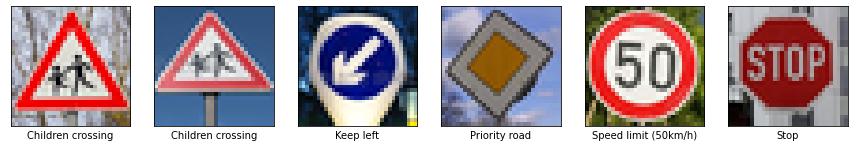

In [186]:
from PIL import Image
import os

web_labels = [28,28,39,12,2,14]

img_dir = "./data/web_images/"
web_images = np.zeros([0, 32, 32, 3], dtype=np.uint8)

for i in range(len(os.listdir(img_dir))):
    img = Image.open(img_dir+str(i)+'.jpg').convert("RGB")
    img = np.array(img.resize((32, 32), Image.ANTIALIAS)).astype(np.uint8)
    
    web_images = np.vstack((web_images, [img]))
    


plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(web_images[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(sign_name[web_labels[i]])
plt.show()



### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from .model/modified_lenet.ckpt


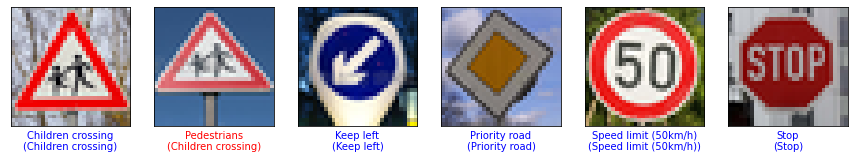

In [198]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Preprocess and perform prediction
web_images_pre = [preprocess(image) for image in web_images]
X_web = web_images_pre
y_web = web_labels
with tf.Session() as sess:
    saver.restore(sess, '.model/modified_lenet.ckpt')
    web_prediction = sess.run(tf.argmax(logits, 1), feed_dict={x: X_web, y:y_web, keep_prob:1})

# plot predictions and labels
plt.figure(figsize=(15,15))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.imshow(web_images[i])
    plt.xticks([])
    plt.yticks([])
    font_color = (web_labels[i] == web_prediction[i]) and "blue" or "red"
    plt.xlabel(sign_name[web_prediction[i]]+"\n("+sign_name[web_labels[i]]+")", fontdict={'color': font_color})
    
plt.show()

### Analyze Performance
Output Top 5 Softmax Probabilities For Each Image Found on the Web

INFO:tensorflow:Restoring parameters from .model/modified_lenet.ckpt
Web Image Accuracy = 0.833


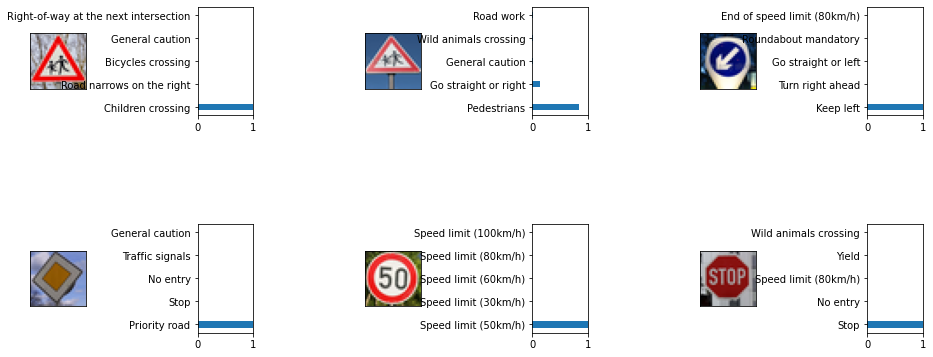

In [264]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

with tf.Session() as sess:
    saver.restore(sess, '.model/modified_lenet.ckpt')
    web_logits = sess.run(logits, feed_dict={x: X_web, y:y_web, keep_prob:1})

    web_prediction = tf.argmax(web_logits, 1)
    web_correct = tf.equal(web_prediction, tf.argmax(tf.one_hot(y_web, 43), 1))
    web_accuracy = sess.run(tf.reduce_mean(tf.cast(web_correct, tf.float32)))

    web_topkv = tf.math.top_k(web_logits, k=5)
    web_probability = sess.run(tf.nn.softmax(web_topkv.values))
    web_probability_indices = sess.run(web_topkv.indices)

print("Web Image Accuracy = {:.3f}".format(web_accuracy))

plt.figure(figsize=(16,6))
plt.subplots_adjust(wspace=2, hspace=1)
for i in range(6):
    plt.subplot(2,6,2*i+1)
    plt.imshow(web_images[i])
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2,6,2*i+2)
    web_probability_class=[sign_name[ind] for ind in web_probability_indices[i]]
    plt.barh(web_probability_class, web_probability[i], height=0.3)
    plt.xlim([0, 1])
    
plt.show()

### Confusion Matrix

INFO:tensorflow:Restoring parameters from .model/modified_lenet.ckpt
Normalized confusion matrix


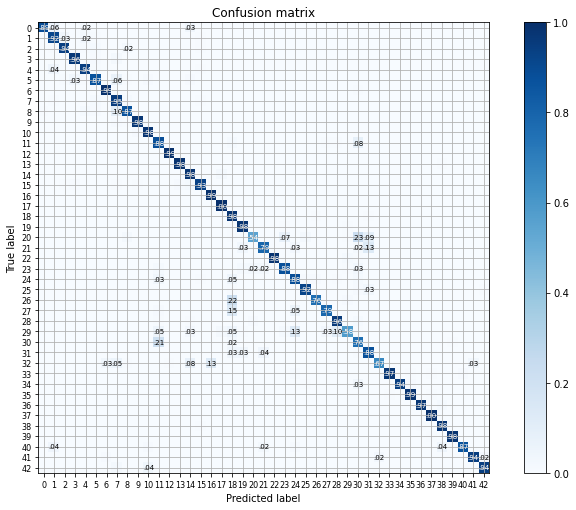

In [270]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.title(title)
    
    tick_marks = np.arange(len(classes))
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    # write the values of confusion matrix
    cm_font ={'size': '7'}
    tick_font = {'size': '8'}
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if cm[i,j] >= 0.02:
            plt.text(j, i, '{:.2f}'.format(cm[i, j])[1:],
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black",
                     **cm_font)
        
    
    plt.xticks(tick_marks, classes, **tick_font)
    plt.yticks(tick_marks, classes, **tick_font)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.tight_layout()
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.colorbar()
    plt.grid()

# perform prediction on testset
with tf.Session() as sess:
    saver.restore(sess, '.model/modified_lenet.ckpt')
    y_test_prediction = sess.run(tf.argmax(logits, 1), feed_dict={x: X_test, y:y_test, keep_prob:1})

# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_test_prediction)
np.set_printoptions(precision=2)
classes = [str(i) for i in range(n_classes)]

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,7))
plot_confusion_matrix(cnf_matrix, classes=classes, title='Confusion matrix', normalize=True)
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.